<a href="https://colab.research.google.com/github/souradipta93/DS_Projects_P_1/blob/master/S_2_Logit_Simmons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Logistic Regression the Crucial Six Steps-Example:Logit-Simmons

In [17]:
#Importing the Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [18]:
#Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
#Reading the File
mydata=pd.read_csv("Logit-Simmons.csv")
mydata.head()

,Customer,Spending,Card,Purchase
0,1,2.2910,1,0
1,2,3.2150,1,0
2,3,2.1350,1,0
3,4,3.9240,0,0
4,5,2.5280,1,0


In [20]:
#Defining Y and X
Y=mydata.Purchase
X=mydata.iloc[:,1:3]


In [21]:
#Explaratory Analysis
MyCrossTab=pd.crosstab(mydata.Purchase,mydata.Card)
MyCrossTab
Table=pd.pivot_table(mydata,values=["Spending"],index=["Purchase","Card"])
print(MyCrossTab) 
print("   ")
print(Table)

Card       0   1
Purchase        
0         36  24
1         14  26
   
               Spending
Purchase Card          
0        0       3.2927
         1       2.4461
1        0       3.3674
         1       4.1920


In [22]:
#Building the Model
import statsmodels.api as sm
logit = sm.Logit(Y.astype(float), sm.add_constant(X.astype(float)))
lg=logit.fit() 
lg.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                  0.1012
Time:                        14:49:57   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
Card           1.0987      0.445      2.471      0.013       0.227       1.970
==============================================================================
"""

In [23]:
#Step1: Overall Validity of the Model:Loglikelyhood
print("LogLikelyhoodRatio=",format(lg.llr_pvalue,"0.6f"))


LogLikelyhoodRatio= 0.001098


In [24]:
#Step2"McFadden R Square
McFaddenR2 = 1-(lg.llf/lg.llnull)
print("McFadden Rsq=",format(McFaddenR2,"0.6f"))

McFadden Rsq= 0.101250


In [25]:
# Step3:Test for Significance of Individual coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = "{:0.4f}".format 
lgcoef

,coef,pval
const,-2.1464,0.0002
Spending,0.3416,0.0079
Card,1.0987,0.0135


In [26]:
#Step4: Odds and Probability 
#Exponential of coef to get odds ratio
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

#Probability from Odds ratio
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])

#Sort dataframe by decreasing Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

,coef,pval,Odds_ratio,probability
Card,1.0987,0.0135,3.0004,0.7500
Spending,0.3416,0.0079,1.4073,0.5846
const,-2.1464,0.0002,0.1169,0.1047


In [27]:
#Step5: Creating the confusion matrix
#Predict probability
X = sm.add_constant(X)
pred_prob = lg.predict(X)
#Compute class from predicted probability
pred_class = (pred_prob>0.5).astype(np.int)
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
#Confusion matrix
print(confusion_matrix(Y.astype(float), pred_class))
print("  ")
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y.astype(float), pred_class),2)
recall = round(recall_score(Y.astype(float), pred_class),2)
precision = round(precision_score(Y.astype(float), pred_class),2)
print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

[[52  8]
 [20 20]]
  
accuracy:  0.72
recall:  0.5
precision:  0.71


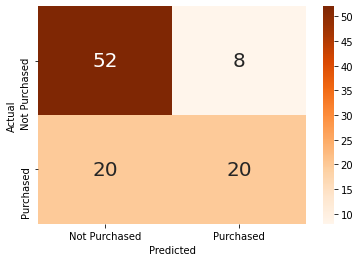

In [34]:
#better Display of confusion matrix:
confusion = confusion_matrix(Y.astype(float), pred_class)
confusion = sn.heatmap(confusion, annot=True, cmap=("Oranges"), annot_kws ={"size":20},
                      xticklabels=["Not Purchased","Purchased"],
                      yticklabels=["Not Purchased","Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

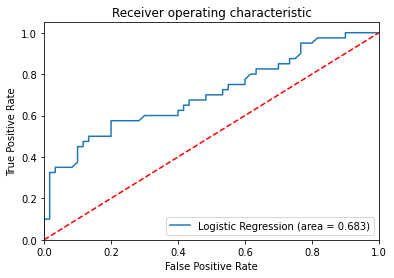

In [35]:
#Step6:ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y.astype(float), pred_class)
fpr, tpr, thresholds = roc_curve(Y.astype(float), pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()